In [8]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
plt.rcParams['figure.figsize'] = (16./3, 9./3)

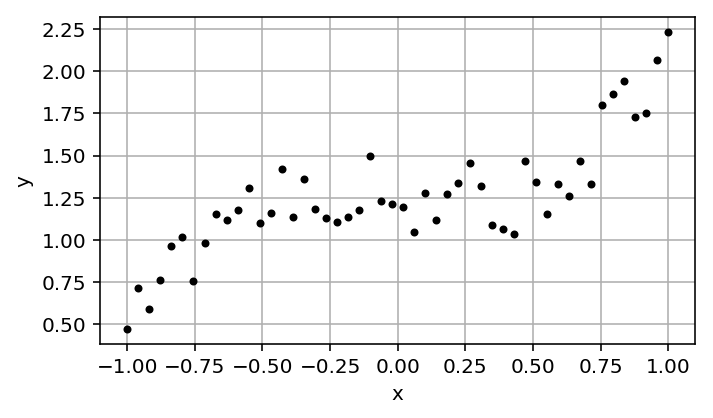

In [10]:
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**3 + 0.1 * x_train**2 -0.15 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
# 특성값 정의
features1 = np.array([[xval] for xval in x_train])
features2 = np.array([[xval**2, xval] for xval in x_train])
features3 = np.array([[xval**3, xval**2, xval] for xval in x_train])
features4 = np.array([[np.cos(np.pi * xval), np.sin(np.pi * xval)]
                      for xval in x_train])
labels = y_train.reshape(-1, 1)

In [12]:
def visualize_l2(pred, x_input, y_train):
    from matplotlib.patches import Rectangle
    plt.plot(x_input, y_train, '.k', markerfacecolor='none')
    plt.plot(x_input, pred,  '--k')
    currentAxis = plt.gca()
    for k, (xx,yy) in enumerate(zip(x_train, y_train)):
        error = pred[k] - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error, error,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')

[[1.]] [1.] 0.2125635
[[0.5135189]] [1.2713628] 0.045872256
[[0.4424453]] [1.2667447] 0.044767123


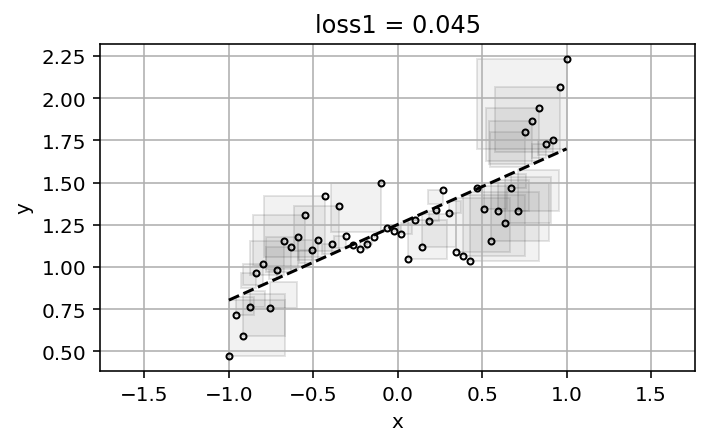

[[1. 1.]] [1.] 0.22603135
[[-0.04760737  0.54382294]] [1.2689118] 0.048572168
[[0.17435758 0.4675408 ]] [1.1939598] 0.04322369


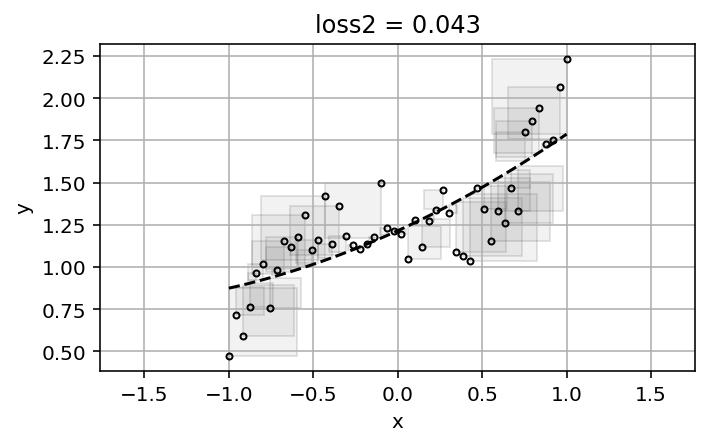

[[1. 1. 1.]] [1.] 0.57014674
[[ 0.43707478 -0.01973688  0.19586755]] [1.2126836] 0.030156227
[[0.61057204 0.15908968 0.02455753]] [1.2120947] 0.022248378


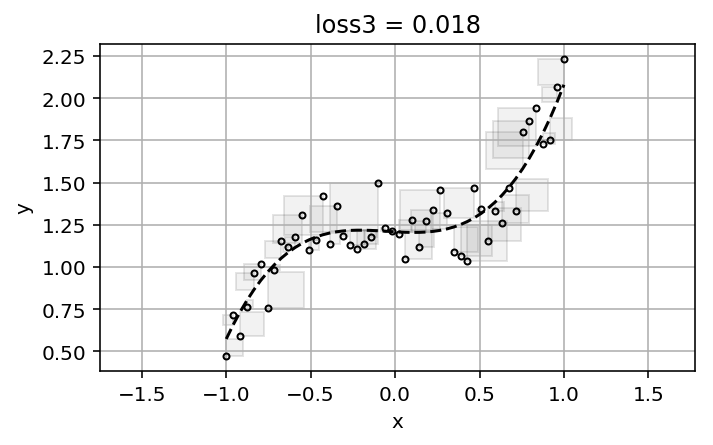

[[1. 1.]] [1.] 1.1056408
[[-0.27018592  0.03585692]] [1.215446] 0.13722545
[[-0.01640794  0.10837846]] [1.252276] 0.107143074


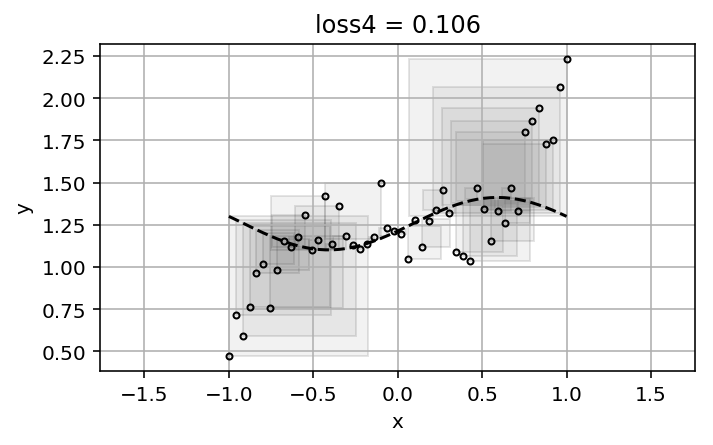

In [13]:
for i, features in enumerate([features1, features2, 
                              features3, features4], 1):
    # 예측모델과 손실함수
    num_features = features.shape[1]
    with tf.variable_scope("Feature{}".format(i)):
        w = tf.Variable(tf.ones([num_features, 1]))
        b = tf.Variable(tf.ones([1]))

    x = tf.placeholder(tf.float32, [None, num_features])
    y = tf.placeholder(tf.float32, [None, 1])
    yhat = tf.matmul(x, w) + b
    loss = tf.reduce_mean(tf.square( yhat - y ))

    # 수치최적화 알고리즘
    MaxEpoch = 15
    batch_size = 10
    lr = 0.1
    optimizer = tf.train.AdamOptimizer(lr)
    train = optimizer.minimize(loss)

    # 데이터 섞기
    np.random.seed(320)
    shuffled_id = np.arange(0, len(x_train))
    np.random.shuffle(shuffled_id)
    shuffled_x_train = features[shuffled_id]
    shuffled_y_train = labels[shuffled_id]

    # 스토캐스틱 방법
    from helper import generate_batches
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(MaxEpoch):
            if epoch % 5 == 0:
                curr_w, curr_b, curr_loss = sess.run(
                                                [w, b, loss],
                                                feed_dict={
                                                    x:features, 
                                                    y:labels})
                print(curr_w.reshape(1,-1), curr_b, curr_loss)
            for x_batch, y_batch in generate_batches(batch_size,
                                                     shuffled_x_train,
                                                     shuffled_y_train):
                sess.run(train, feed_dict={x:x_batch, y:y_batch})

        w_tf_sgd, b_tf_sgd = sess.run([w, b])
        prediction_values = sess.run(yhat, feed_dict={x:features})
        final_loss = sess.run(loss, feed_dict={x:features, y:labels})
        plt.title("loss{} = {:1.3f}".format(i, final_loss))
        visualize_l2(prediction_values, x_train, labels)
        plt.show()

In [14]:
features = np.array([[xval] for xval in x_train])

0


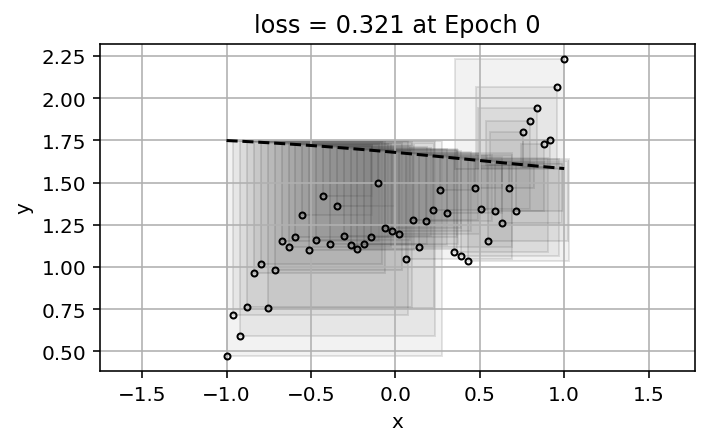

20


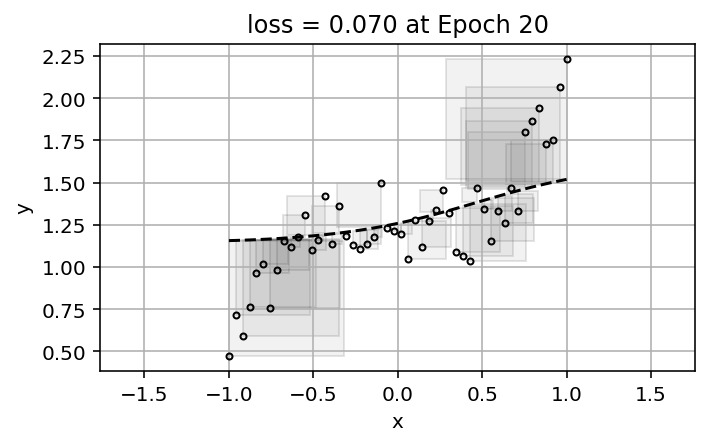

40


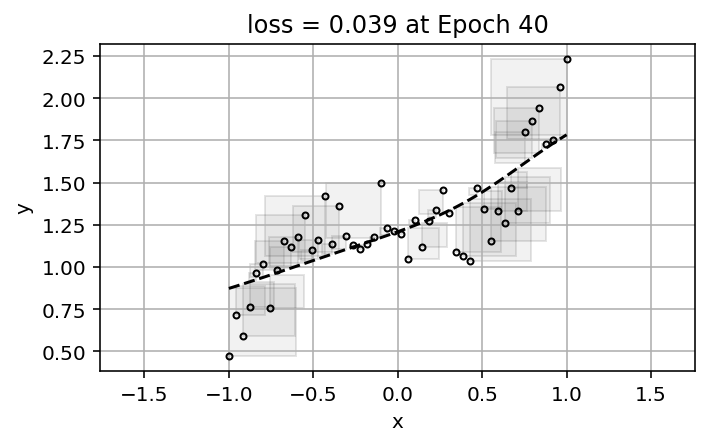

60


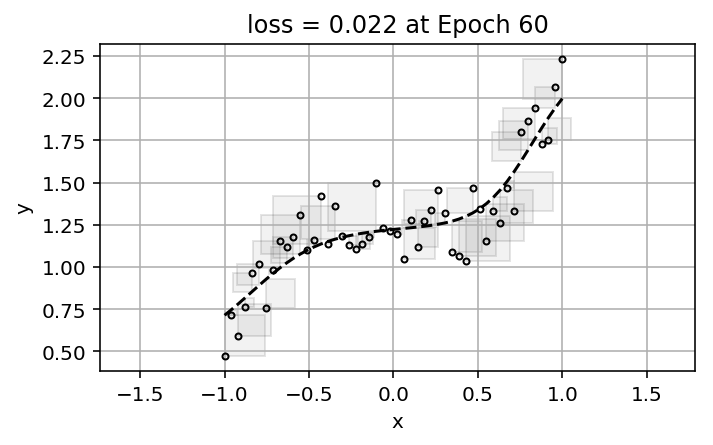

80


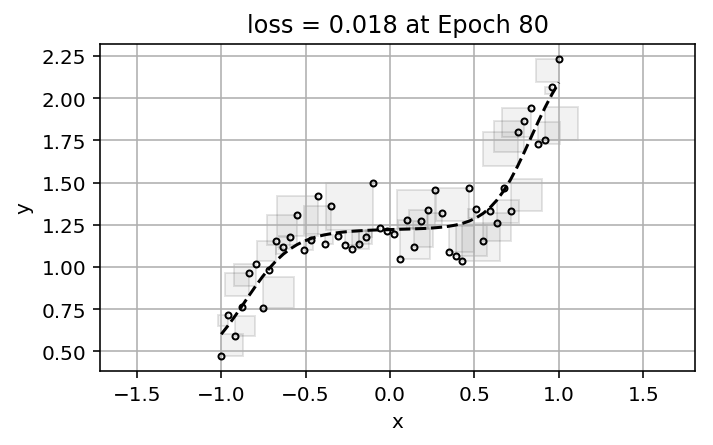

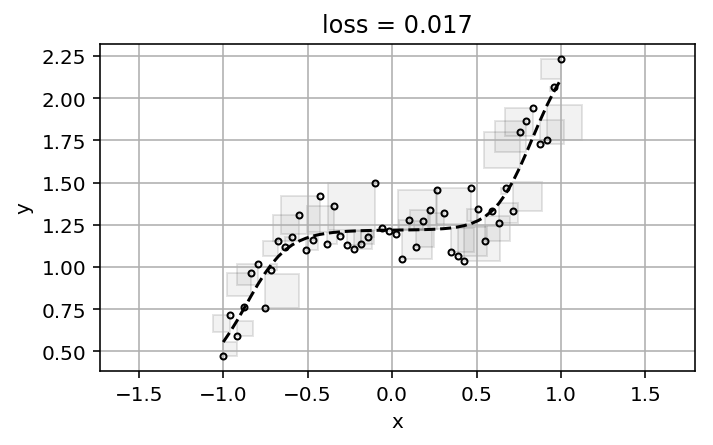

In [15]:
num_hidden1 = 10
num_hidden2 = 5

# 입력층
x = tf.placeholder(tf.float32, shape=[None, 1])

with tf.variable_scope("Neural_Network".format(i)):
    # 레이어 1의 Weight
    W1 = tf.Variable(tf.random_normal([1, num_hidden1], seed=624))
    b1 = tf.Variable(tf.random_normal([num_hidden1], seed=624))

    # 레이어 2의 Weight
    W2 = tf.Variable(tf.random_normal([num_hidden1, num_hidden2], seed=624))
    b2 = tf.Variable(tf.random_normal([num_hidden2], seed=624))

    # 레이어 3의 Weight
    W3 = tf.Variable(tf.random_normal([num_hidden2, 1], seed=624))
    b3 = tf.Variable(tf.random_normal([1], seed=624))

# 은닉층 1
hidden1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

# 은닉층 2
hidden2 = tf.nn.sigmoid(tf.matmul(hidden1, W2) + b2)

# 출력층
yhat = tf.matmul(hidden2, W3) + b3

# 손실함수
y = tf.placeholder(tf.float32, shape=[None, 1])
loss = tf.reduce_mean(tf.square(y - yhat))

# 수치최적화 알고리즘
MaxEpoch = 100
batch_size = 10
lr = 0.1
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

# 스토캐스틱 방법
from helper import generate_batches
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        for x_batch, y_batch in generate_batches(batch_size, 
                                                 shuffled_x_train, 
                                                 shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})
            
        if epoch % 20 == 0:
            print(epoch)
            final_loss, pred = sess.run([loss, yhat], feed_dict={x:features, y:labels})

            plt.title("loss = {:1.3f} at Epoch {}".format(final_loss, epoch))
            visualize_l2(pred, x_train, y_train)
            plt.show()
    final_loss, pred = sess.run([loss, yhat], feed_dict={x:features,
                                                         y:labels})

plt.title("loss = {:1.3f}".format(final_loss))
visualize_l2(pred, x_train, y_train)
plt.show()

0


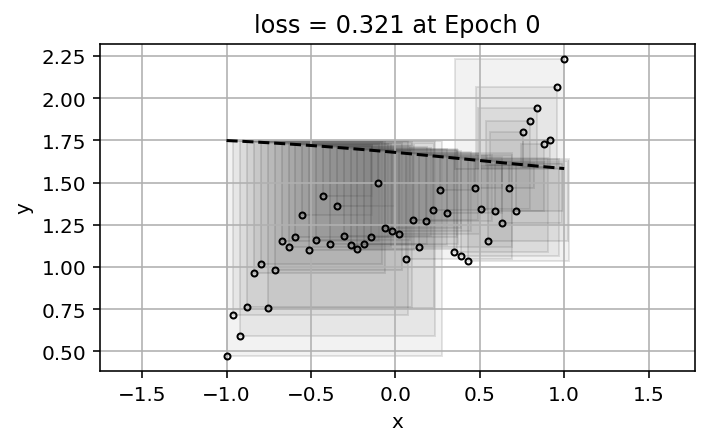

20


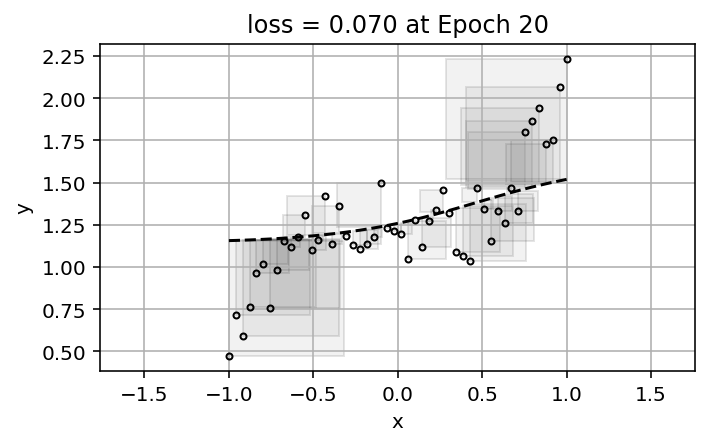

40


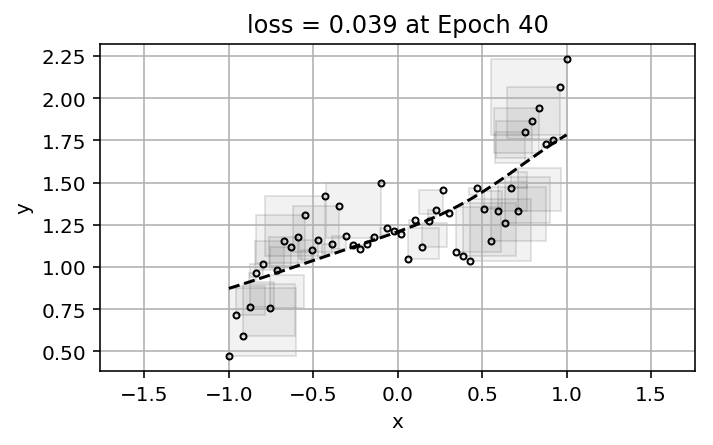

60


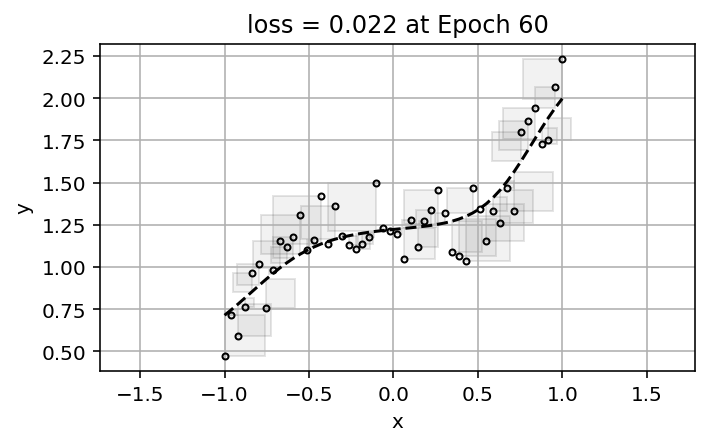

80


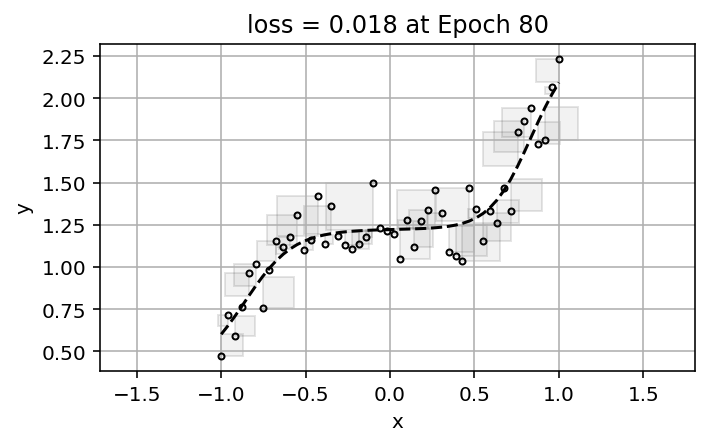

100


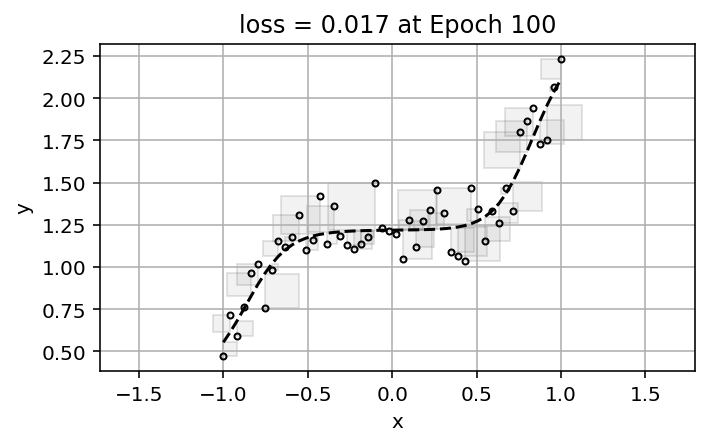

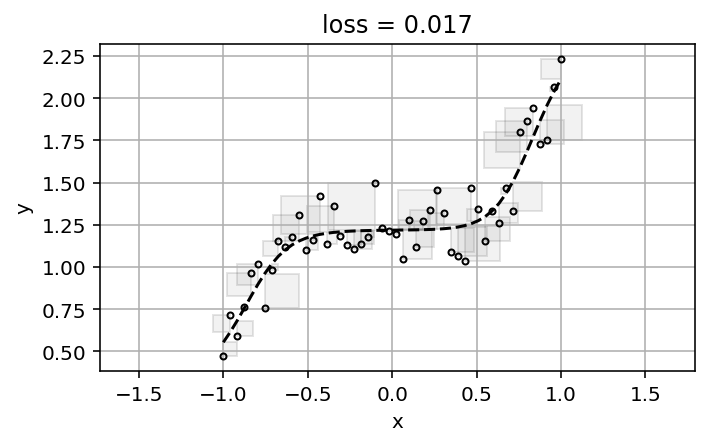

In [18]:
num_hidden1 = 10
num_hidden2 = 5

rand_init = tf.random_normal_initializer(seed=624)

# 입력층
x = tf.placeholder(tf.float32, shape=[None, 1])

# 은닉층 1
hidden1 = tf.contrib.layers.fully_connected(x, num_hidden1, 
                                    activation_fn=tf.nn.sigmoid,
                                    weights_initializer=rand_init,
                                    biases_initializer=rand_init)

# 은닉층 2
hidden2 = tf.contrib.layers.fully_connected(hidden1, num_hidden2,
                                    activation_fn=tf.nn.sigmoid,
                                    weights_initializer=rand_init,
                                    biases_initializer=rand_init)

# 출력층
yhat =  tf.contrib.layers.fully_connected(hidden2, 1,
                                  activation_fn=None,
                                  weights_initializer=rand_init,
                                  biases_initializer=rand_init)
# 손실함수
y = tf.placeholder(tf.float32, shape=[None, 1])
loss = tf.losses.mean_squared_error(y, yhat)


# 수치최적화 알고리즘
MaxEpoch = 100
batch_size = 10
lr = 0.1
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

# 스토캐스틱 방법
from helper import generate_batches
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch+1):
        for x_batch, y_batch in generate_batches(batch_size, 
                                                 shuffled_x_train, 
                                                 shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})
            
        if epoch % 20 == 0:
            print(epoch)
            final_loss, pred = sess.run([loss, yhat], 
                                        feed_dict={x:features, 
                                                   y:labels})

            plt.title("loss = {:1.3f} at Epoch {}".format(final_loss,
                                                          epoch))
            visualize_l2(pred, x_train, y_train)
            plt.show()
    final_loss, pred = sess.run([loss, yhat], feed_dict={x:features,
                                                         y:labels})

plt.title("loss = {:1.3f}".format(final_loss))
visualize_l2(pred, x_train, y_train)
plt.show()

In [11]:
for var in tf.trainable_variables():
    var_name = var.name
    var_shape = var.shape
    print(var_name, var_shape, np.prod(var_shape))

Feature1/Variable:0 (1, 1) 1
Feature1/Variable_1:0 (1,) 1
Feature2/Variable:0 (2, 1) 2
Feature2/Variable_1:0 (1,) 1
Feature3/Variable:0 (3, 1) 3
Feature3/Variable_1:0 (1,) 1
Feature4/Variable:0 (2, 1) 2
Feature4/Variable_1:0 (1,) 1
Neural_Network/Variable:0 (1, 10) 10
Neural_Network/Variable_1:0 (10,) 10
Neural_Network/Variable_2:0 (10, 5) 50
Neural_Network/Variable_3:0 (5,) 5
Neural_Network/Variable_4:0 (5, 1) 5
Neural_Network/Variable_5:0 (1,) 1
fully_connected/weights:0 (1, 10) 10
fully_connected/biases:0 (10,) 10
fully_connected_1/weights:0 (10, 5) 50
fully_connected_1/biases:0 (5,) 5
fully_connected_2/weights:0 (5, 1) 5
fully_connected_2/biases:0 (1,) 1


0


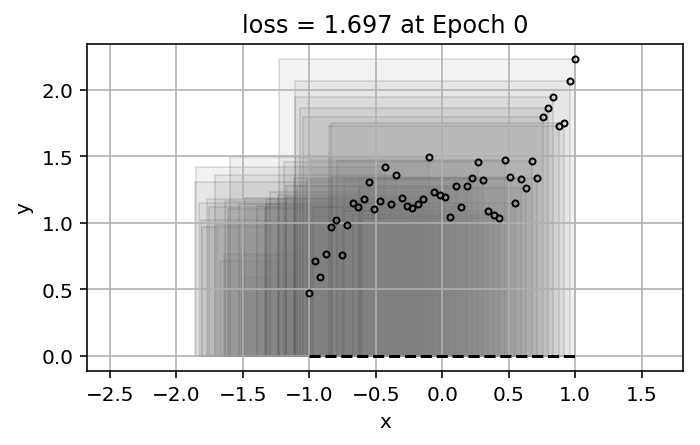

40


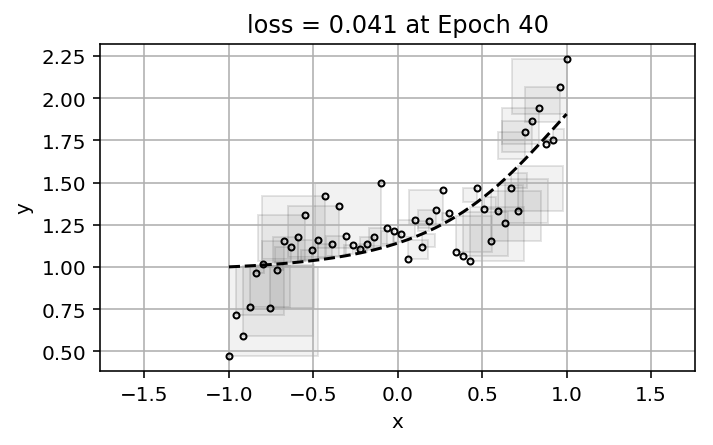

80


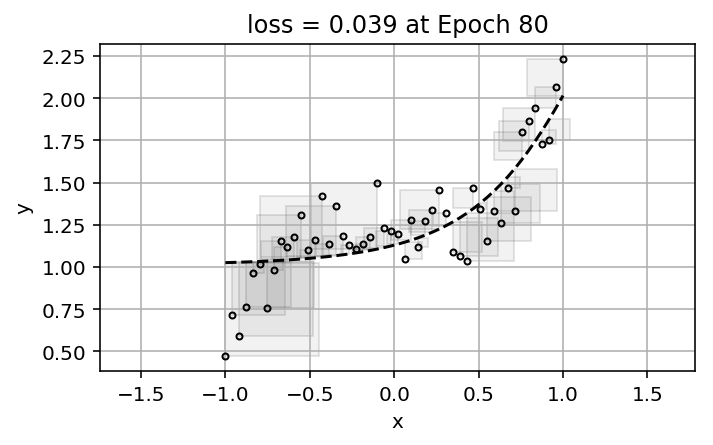

100


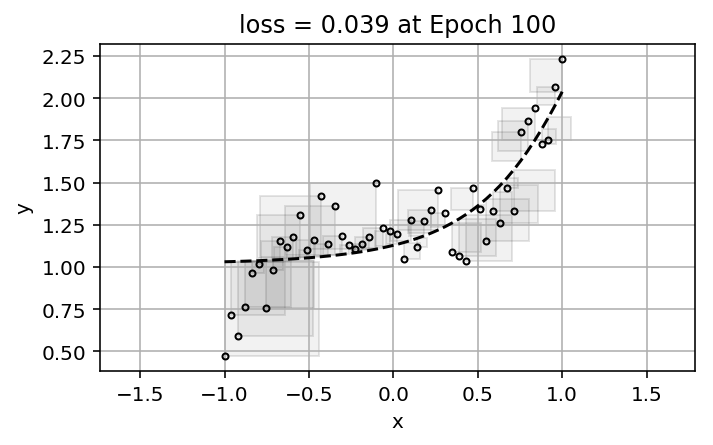

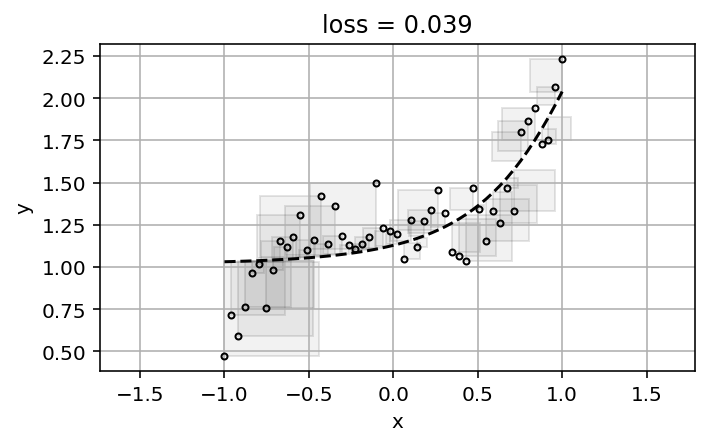

In [19]:
num_hidden1 = 10
num_hidden2 = 5
zero_init = tf.zeros_initializer

# 입력층
x = tf.placeholder(tf.float32, shape=[None, 1])

# 은닉층 1
hidden1 = tf.contrib.layers.fully_connected(x, num_hidden1, 
                                            activation_fn=tf.nn.sigmoid,
                                            weights_initializer=zero_init,
                                            biases_initializer=zero_init)

# 은닉층 2
hidden2 = tf.contrib.layers.fully_connected(hidden1, num_hidden2,
                                            activation_fn=tf.nn.sigmoid,
                                            weights_initializer=zero_init,
                                            biases_initializer=zero_init)

# 출력층
yhat =  tf.contrib.layers.fully_connected(hidden2, 1,
                                          activation_fn=None,
                                          weights_initializer=zero_init,
                                          biases_initializer=zero_init)
# 손실함수
y = tf.placeholder(tf.float32, shape=[None, 1])
loss = tf.reduce_mean(tf.square(y - yhat))


# 수치최적화 알고리즘
MaxEpoch = 100
batch_size = 10
lr = 0.1
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

# 스토캐스틱 방법
from helper import generate_batches
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch+1):
        if epoch in [0, 40, 80, 100]:
            print(epoch)
            final_loss, pred = sess.run([loss, yhat], feed_dict={x:features, y:labels})

            plt.title("loss = {:1.3f} at Epoch {}".format(final_loss, epoch))
            visualize_l2(pred, x_train, y_train)
            plt.show()
        for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})

    final_loss, pred = sess.run([loss, yhat], feed_dict={x:features, y:labels})

plt.title("loss = {:1.3f}".format(final_loss))
visualize_l2(pred, x_train, y_train)
plt.show()

0


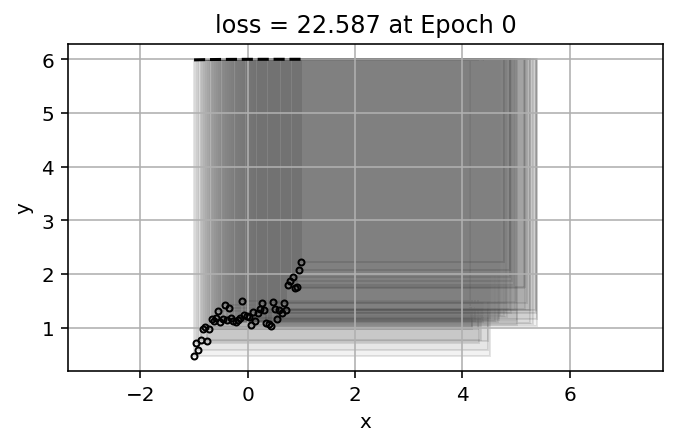

40


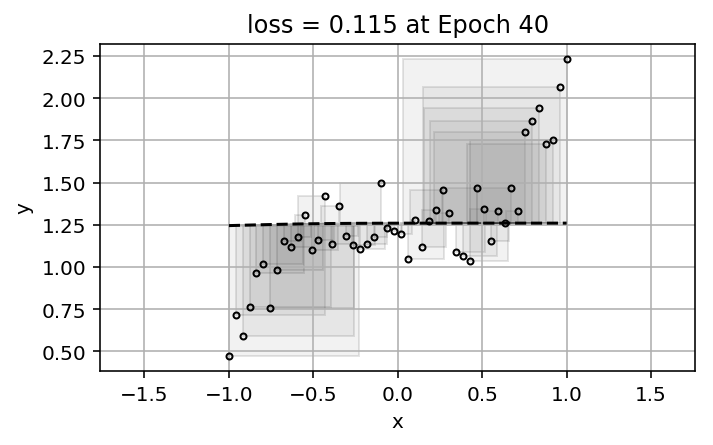

80


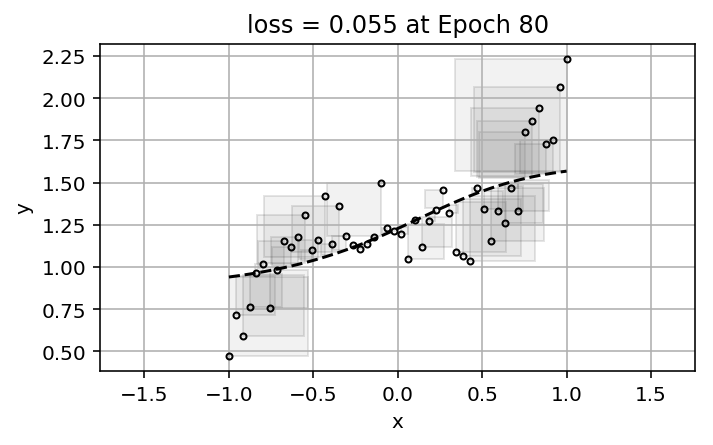

100


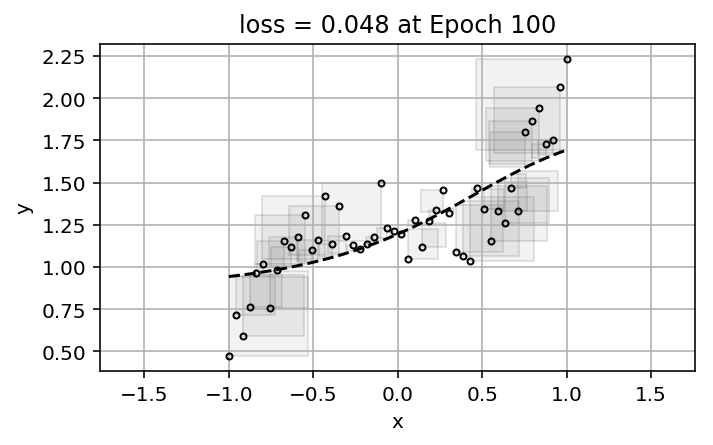

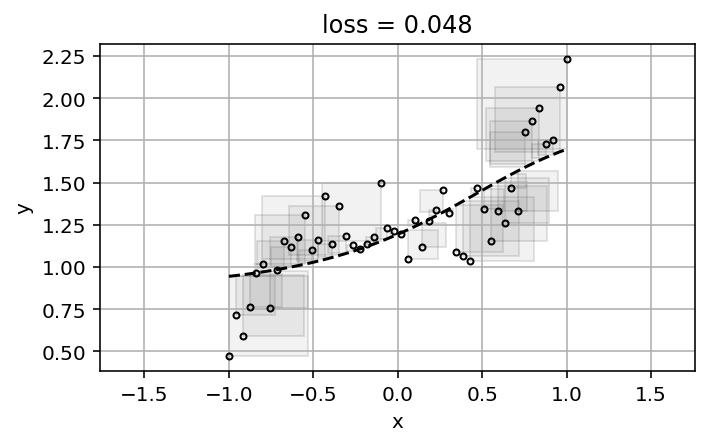

In [20]:
num_hidden1 = 10
num_hidden2 = 5
one_init = tf.ones_initializer

# 입력층
x = tf.placeholder(tf.float32, shape=[None, 1])

# 은닉층 1
hidden1 = tf.contrib.layers.fully_connected(x, num_hidden1, 
                                            activation_fn=tf.nn.sigmoid,
                                            weights_initializer=one_init,
                                            biases_initializer=one_init)

# 은닉층 2
hidden2 = tf.contrib.layers.fully_connected(hidden1, num_hidden2,
                                            activation_fn=tf.nn.sigmoid,
                                            weights_initializer=one_init,
                                            biases_initializer=one_init)

# 출력층
yhat =  tf.contrib.layers.fully_connected(hidden2, 1,
                                          activation_fn=None,
                                          weights_initializer=one_init,
                                          biases_initializer=one_init)
# 손실함수
y = tf.placeholder(tf.float32, shape=[None, 1])
loss = tf.reduce_mean(tf.square(y - yhat))


# 수치최적화 알고리즘
MaxEpoch = 100
batch_size = 10
lr = 0.1
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

# 스토캐스틱 방법
from helper import generate_batches
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch+1):
        if epoch in [0, 40, 80, 100]:
            print(epoch)
            final_loss, pred = sess.run([loss, yhat], feed_dict={x:features, y:labels})

            plt.title("loss = {:1.3f} at Epoch {}".format(final_loss, epoch))
            visualize_l2(pred, x_train, y_train)
            plt.show()
        for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})
    final_loss, pred = sess.run([loss, yhat], feed_dict={x:features, y:labels})

plt.title("loss = {:1.3f}".format(final_loss))
visualize_l2(pred, x_train, y_train)
plt.show()

0


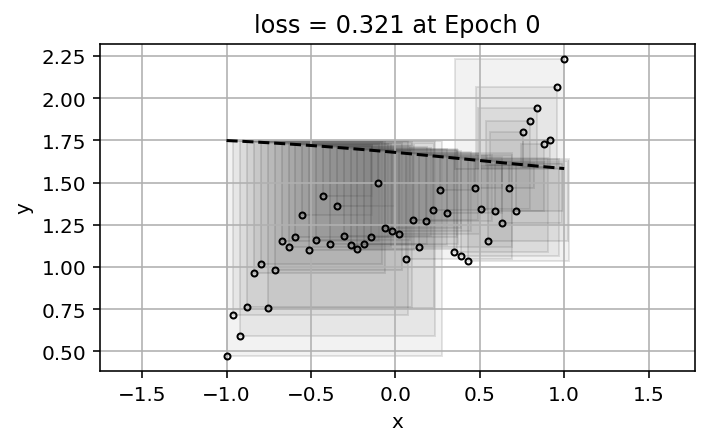

1000


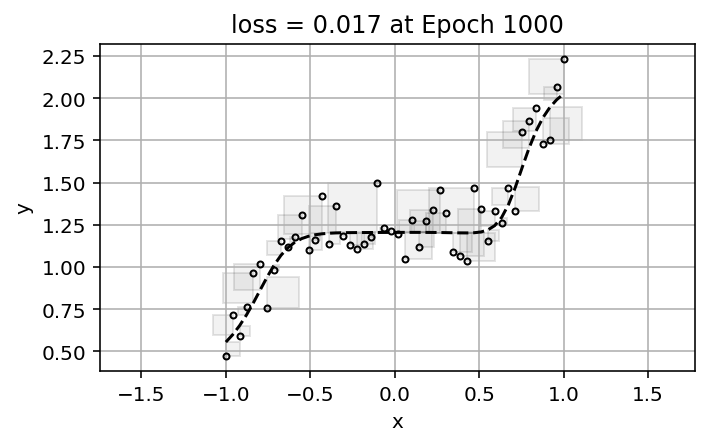

2000


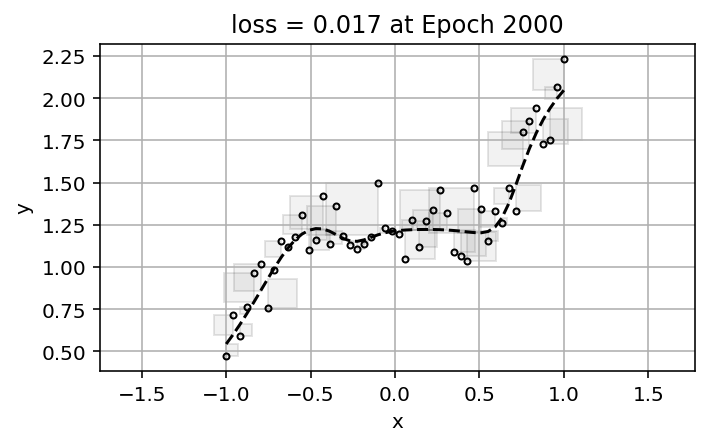

3000


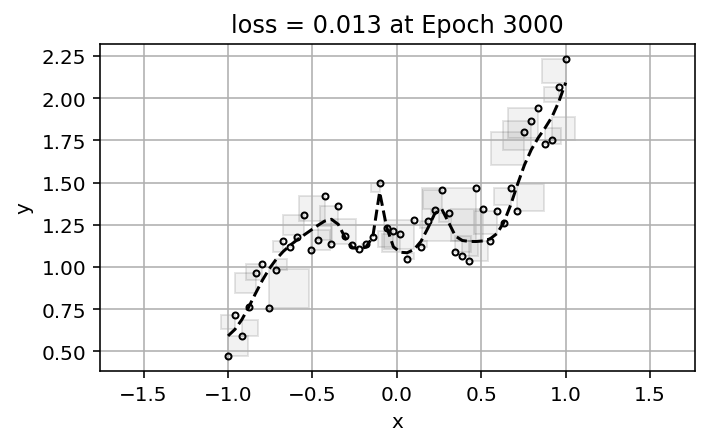

4000


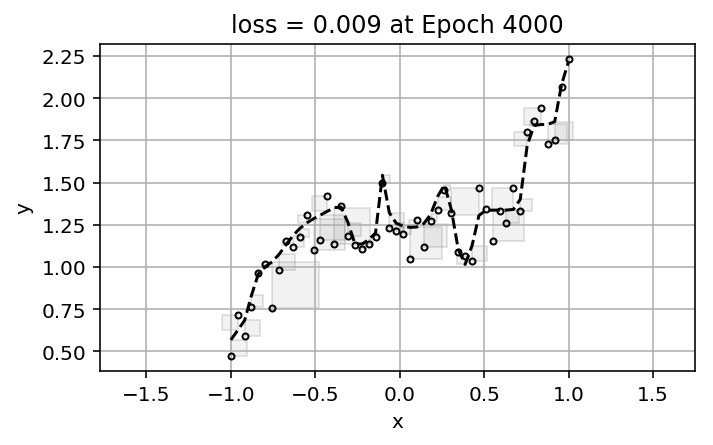

5000


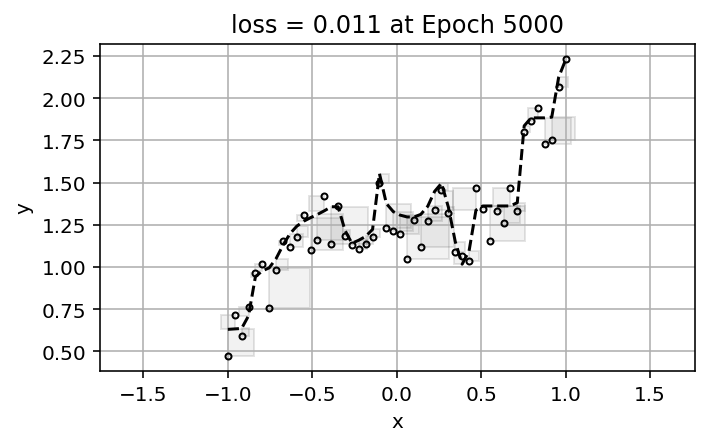

6000


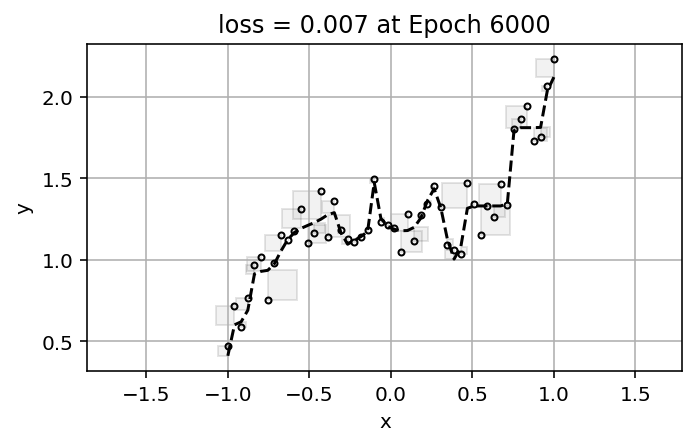

7000


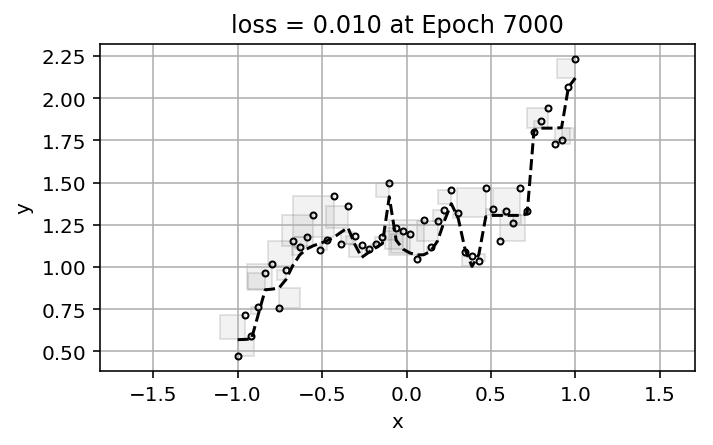

8000


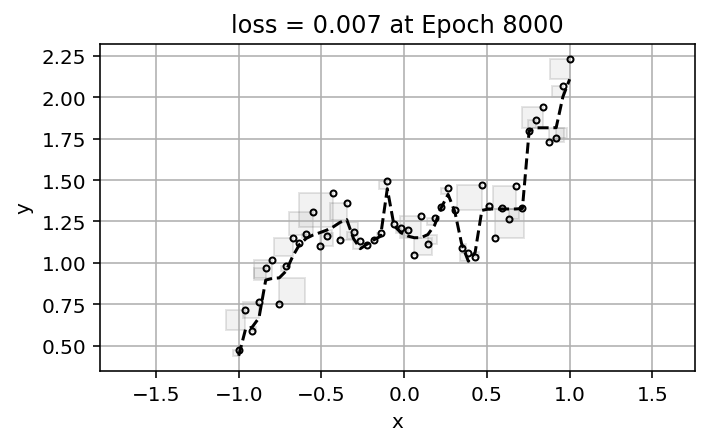

9000


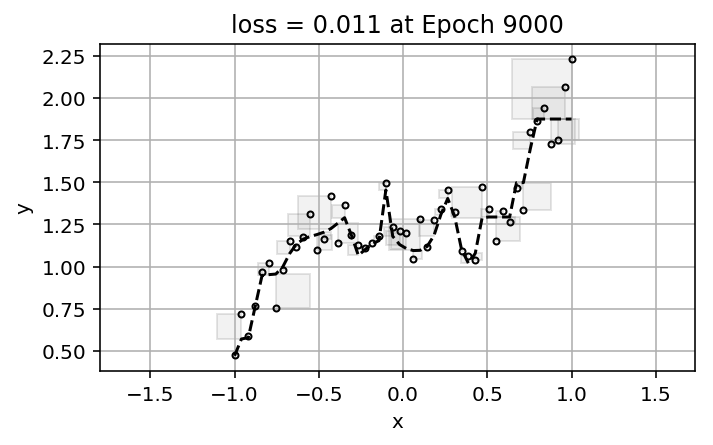

10000


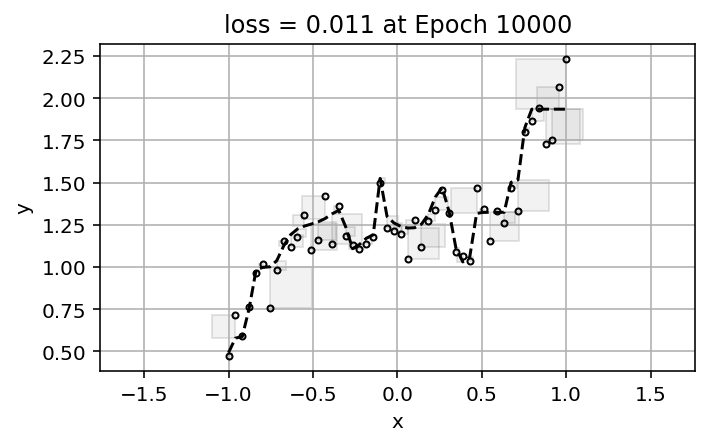

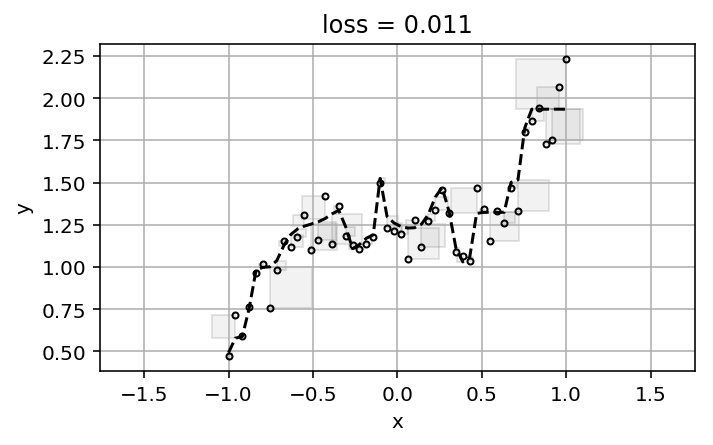

In [21]:
num_hidden1 = 10
num_hidden2 = 5
rand_init = tf.random_normal_initializer(seed=624)

# 입력층
x = tf.placeholder(tf.float32, shape=[None, 1])

# 은닉층 1
hidden1 = tf.contrib.layers.fully_connected(x, num_hidden1, 
                                            activation_fn=tf.nn.sigmoid,
                                            weights_initializer=rand_init,
                                            biases_initializer=rand_init)

# 은닉층 2
hidden2 = tf.contrib.layers.fully_connected(hidden1, num_hidden2,
                                            activation_fn=tf.nn.sigmoid,
                                            weights_initializer=rand_init,
                                            biases_initializer=rand_init)

# 출력층
yhat =  tf.contrib.layers.fully_connected(hidden2, 1,
                                          activation_fn=None,
                                          weights_initializer=rand_init,
                                          biases_initializer=rand_init)
# 손실함수
y = tf.placeholder(tf.float32, shape=[None, 1])
loss = tf.losses.mean_squared_error(y, yhat)


# 수치최적화 알고리즘
MaxEpoch = 10001
batch_size = 10
lr = 0.1
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

# 스토캐스틱 방법
from helper import generate_batches
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        for x_batch, y_batch in generate_batches(batch_size,
                                                 shuffled_x_train,
                                                 shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})
        if epoch % 1000 == 0:
            print(epoch)
            final_loss, pred = sess.run([loss, yhat], 
                                        feed_dict={x:features, 
                                                   y:labels})

            plt.title("loss = {:1.3f} at Epoch {}".format(final_loss,
                                                          epoch))
            visualize_l2(pred, x_train, y_train)
            plt.show()
    final_loss, pred = sess.run([loss, yhat], feed_dict={x:features,
                                                         y:labels})
plt.title("loss = {:1.3f}".format(final_loss))
visualize_l2(pred, x_train, y_train)
plt.show()